In [1]:
import numpy as np 
import pandas as pd 


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [5]:
df.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000th",B+,SehatAQUA,254,21172,73312511


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Rank             5000 non-null object
Grade            5000 non-null object
Channel name     5000 non-null object
Video Uploads    5000 non-null object
Subscribers      5000 non-null object
Video views      5000 non-null int64
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [7]:
#df['Subscribers'] = df['Subscribers'].convert_objects(convert_numeric=True)
#df['Video Uploads'] = df['Video Uploads'].convert_objects(convert_numeric=True)

df['Subscribers'] = pd.to_numeric(df['Subscribers'], errors='coerce')
df['Video Uploads'] = pd.to_numeric(df['Video Uploads'], errors='coerce')

**Exploratory data analysis**

Here I start with plotting some bar graphs showing top 20 in each kind of classification of the channels. First three are top 20 by their ranking, where their number of viewers, subscribers and video views are presented. The second three are top 20 based on each of the group themselves. 

Text(0.5,1,'Number of subscribers of top 20 channels')

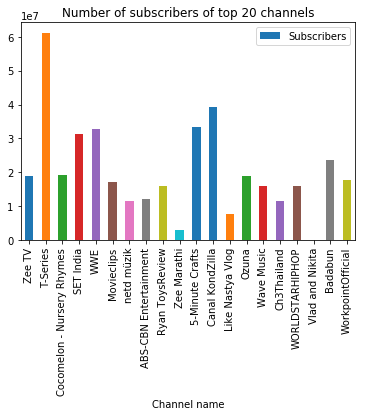

In [8]:
df.head(20).plot.bar(x = 'Channel name', y = 'Subscribers')
plt.title('Number of subscribers of top 20 channels')

Text(0.5,1,'Number of video views of top 20 channels')

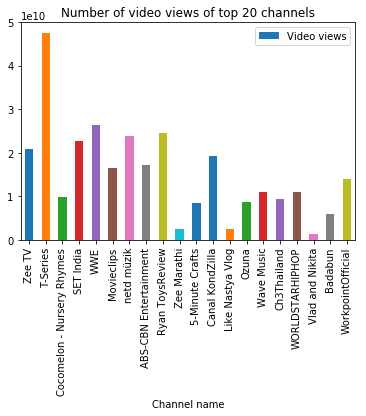

In [9]:
df.head(20).plot.bar(x = 'Channel name', y = 'Video views')
plt.title('Number of video views of top 20 channels')

Text(0.5,1,'Number of video uploads of top 20 channels')

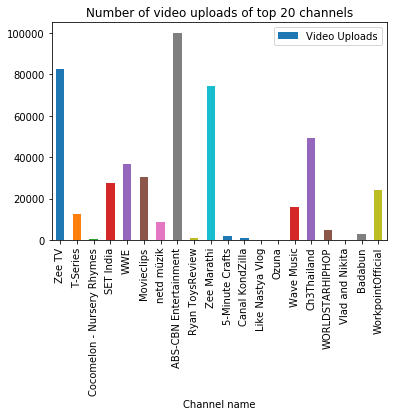

In [10]:
df.head(20).plot.bar(x = 'Channel name', y = 'Video Uploads')
plt.title('Number of video uploads of top 20 channels')

Text(0.5,1,'Top 20 channels with maximum number of subscribers')

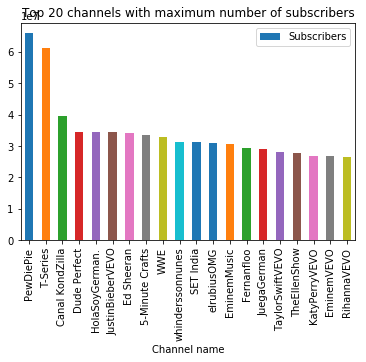

In [12]:
df.sort_values(by = ['Subscribers'], ascending = False).head(20).plot.bar(x = 'Channel name', y = 'Subscribers')
plt.title('Top 20 channels with maximum number of subscribers')

Text(0.5,1,'Top 20 channels with maximum number of video views')

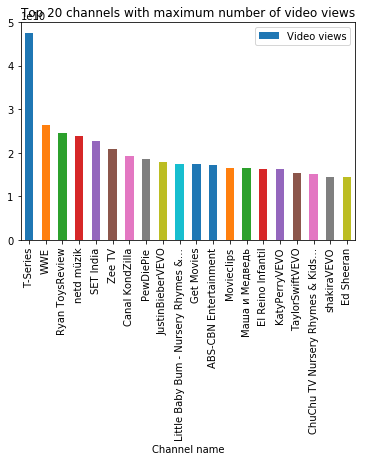

In [11]:
df.sort_values(by = ['Video views'], ascending = False).head(20).plot.bar(x = 'Channel name', y = 'Video views')
plt.title('Top 20 channels with maximum number of video views')

Text(0.5,1,'Top 20 channels with maximum number of video uploads')

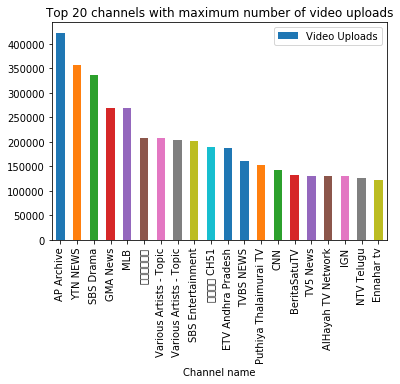

In [12]:
df.sort_values(by = ['Video Uploads'], ascending = False).head(20).plot.bar(x = 'Channel name', y = 'Video Uploads')
plt.title('Top 20 channels with maximum number of video uploads')

Text(0,0.5,'Number of subscribers')

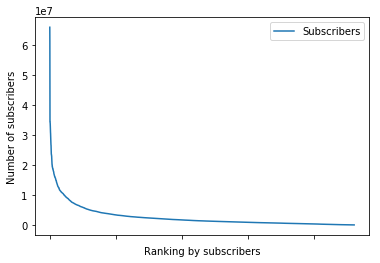

In [13]:
df.sort_values(by = ['Subscribers'], ascending = False).plot(x = 'Channel name', y = 'Subscribers')
plt.xlabel('Ranking by subscribers')
plt.ylabel('Number of subscribers')

Text(0,0.5,'Number of video views')

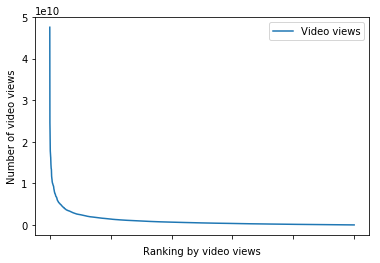

In [14]:
df.sort_values(by = ['Video views'], ascending = False).plot(x = 'Channel name', y = 'Video views')
plt.xlabel('Ranking by video views')
plt.ylabel('Number of video views')

Text(0,0.5,'Number of video uploads')

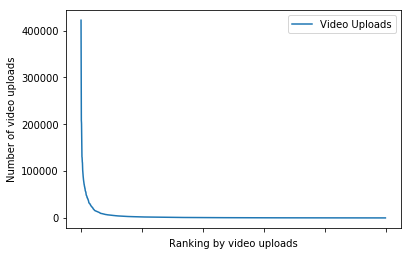

In [15]:
df.sort_values(by = ['Video Uploads'], ascending = False).plot(x = 'Channel name', y = 'Video Uploads')
plt.xlabel('Ranking by video uploads')
plt.ylabel('Number of video uploads')

**Analysing by channel grades**

In [16]:
grade_name = list(set(df['Grade']))
grade_name

['B+ ', 'A- ', 'A+ ', 'A ', '\xa0 ', 'A++ ']

In [17]:
df_by_grade = df.set_index(df['Grade'])

count_grade = list()
for grade in grade_name:
    count_grade.append(len(df_by_grade.loc[[grade]]))

In [18]:
df_by_grade.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
Grade,,,,,,
A++,1st,A++,Zee TV,82757.0,18752951.0,20869786591
A++,2nd,A++,T-Series,12661.0,61196302.0,47548839843
A++,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082
A++,4th,A++,SET India,27323.0,31180559.0,22675948293
A++,5th,A++,WWE,36756.0,32852346.0,26273668433


In [19]:
print(count_grade)
print(grade_name)

[2956, 1024, 41, 963, 6, 10]
['B+ ', 'A- ', 'A+ ', 'A ', '\xa0 ', 'A++ ']


In [20]:
grade_name[2] = 'missing'

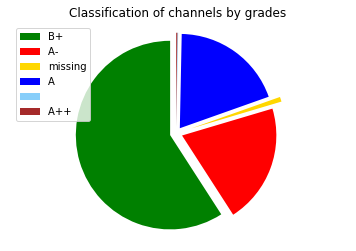

In [21]:
labels = grade_name
sizes = count_grade

explode1 = (0.2, 0.2, 0.5, 0.2, 0.2, 0.2)
color_list = ['green',  'red', 'gold', 'blue', 'lightskyblue', 'brown']

patches, texts = plt.pie(sizes, colors = color_list, explode = explode1, 
                         shadow = False, startangle = 90, radius = 3)
plt.legend(patches, labels, loc = "best")
plt.axis('equal')
plt.title('Classification of channels by grades')
plt.show()

In [22]:
df.describe()

,Video Uploads,Subscribers,Video views
count,4994.000000,4.613000e+03,5.000000e+03
mean,3859.463556,2.620004e+06,1.071449e+09
std,17085.866498,3.926447e+06,2.003844e+09
min,1.000000,3.010000e+02,7.500000e+01
25%,141.000000,6.098940e+05,1.862329e+08
50%,443.000000,1.350477e+06,4.820548e+08
75%,1501.750000,2.950056e+06,1.124368e+09
max,422326.000000,6.599531e+07,4.754884e+10


Text(0,0.5,'Log count')

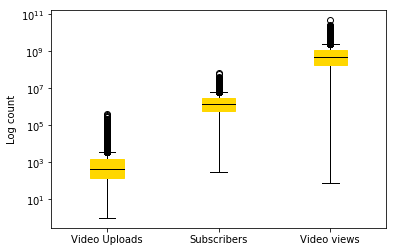

In [23]:
props = dict(boxes="gold", whiskers="Black", medians="Black", caps="Black")
df.plot.box(color=props, patch_artist=True)
plt.yscale('log')
plt.ylabel('Log count')

**Relation between variables**



Text(0.5,1,'Correlation Matrix Plot')

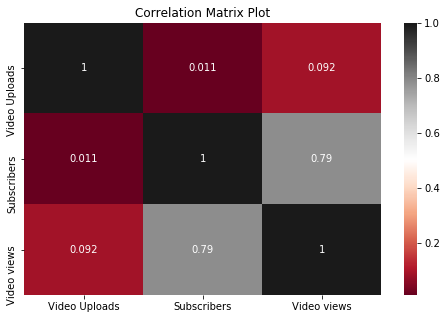

In [24]:
plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(), cmap = 'RdGy',annot=True)
plt.title('Correlation Matrix Plot')

In [25]:
df_clean = df.dropna()

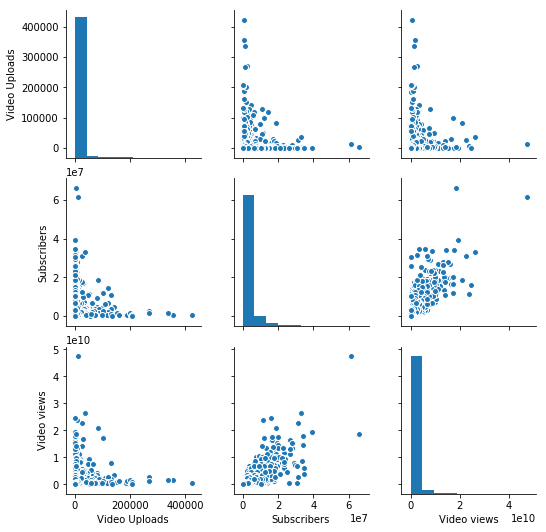

In [26]:
sns.pairplot(df_clean)

In [27]:
X = df_clean[['Video Uploads', 'Video views']]
Y = df_clean[['Subscribers']]

20% of the data is randomly splitted for the testing purpose. 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [29]:
lm = LinearRegression()
lm.fit(X_train.dropna(),y_train.dropna())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
predictions = lm.predict(X_test)

Text(0,0.5,'Predicted Y')

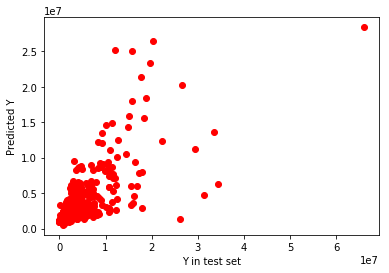

In [31]:
plt.scatter(y_test,predictions, color = 'red')
plt.xlabel('Y in test set')
plt.ylabel('Predicted Y')

Text(0.5,1,'standardized residual plot')

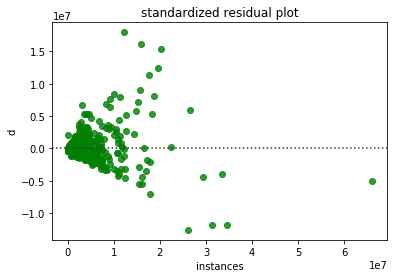

In [32]:
sns.residplot(y_test, predictions,  color="g")
plt.ylabel('d')
plt.xlabel('instances')
plt.title('standardized residual plot')

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1424083.162140944
MSE: 8981770916473.871
RMSE: 2996960.2794287866


In [34]:
coefficients = pd.DataFrame(X.columns)
coefficients['coefficients']=lm.coef_[0]
coefficients

,0,coefficients
0,Video Uploads,-11.008484
1,Video views,0.001469


In [35]:
model = sm.OLS(Y, X).fit() 
predictions = model.predict(X_test)

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Subscribers   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     5729.
Date:                Thu, 25 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:19:42   Log-Likelihood:                -74507.
No. Observations:                4610   AIC:                         1.490e+05
Df Residuals:                    4608   BIC:                         1.490e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Video Uploads    -5.5892      2.083     -2.683      0.007      -9.673      -1.505
Video views       0.0017    1.6e-05    105.687      0.000       0.002       0.002
==============================================================================
Omnibus:                     2968.430   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           307668.098
Skew:                           2.201   Prob(JB):                         0.00
Kurtosis:                      42.779   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Working over the skewness of the data**

Form the following three histogram, we can see that all three variables are highly positively skewed. 

Text(0,0.5,'Number of channels')

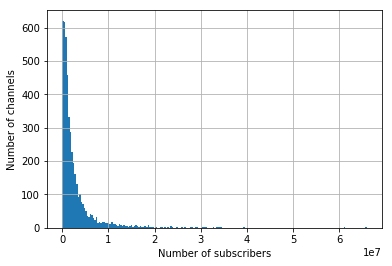

In [37]:
df['Subscribers'].hist(bins = 200)
plt.xlabel('Number of subscribers')
plt.ylabel('Number of channels')

Text(0,0.5,'Number of channels')

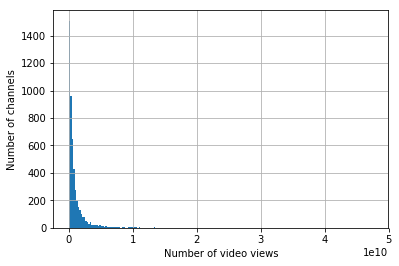

In [38]:
df['Video views'].hist(bins = 200)
plt.xlabel('Number of video views')
plt.ylabel('Number of channels')

Text(0,0.5,'Number of channels')

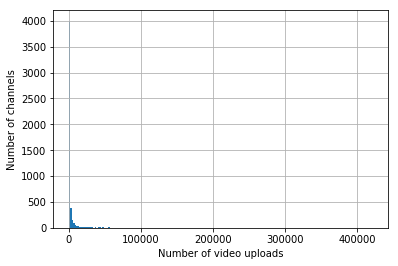

In [39]:
df['Video Uploads'].hist(bins = 200)
plt.xlabel('Number of video uploads')
plt.ylabel('Number of channels')

**Log transformation**

In view of the positive skewness of the data, simple log transformation could be a good choice to deal with.

Text(0,0.5,'Number of channels')

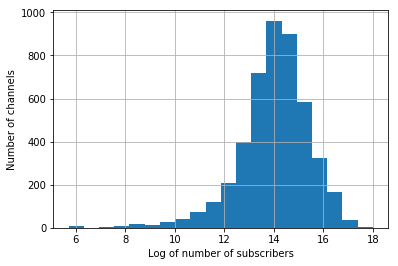

In [40]:
np.log(df['Subscribers']).hist(bins = 20)
plt.xlabel('Log of number of subscribers')
plt.ylabel('Number of channels')

Text(0,0.5,'Number of channels')

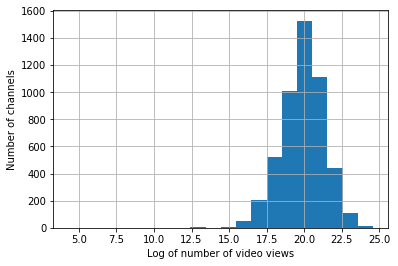

In [41]:
np.log(df['Video views']).hist(bins = 20)
plt.xlabel('Log of number of video views')
plt.ylabel('Number of channels')

Text(0,0.5,'Number of channels')

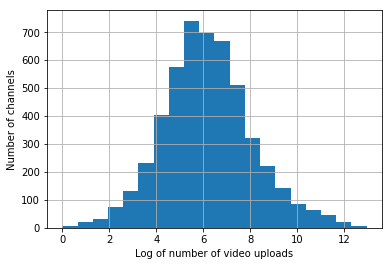

In [42]:
np.log(df['Video Uploads']).hist(bins= 20)
plt.xlabel('Log of number of video uploads')
plt.ylabel('Number of channels')

In [43]:
df_log = pd.DataFrame()
df_log['Video_uploads_log'] = np.log(df_clean['Video Uploads'])
df_log['Video_views_log'] = np.log(df_clean['Video views'])
df_log['Subscribers_log'] = np.log(df_clean['Subscribers'])

In [44]:
df_log.head()

,Video_uploads_log,Video_views_log,Subscribers_log
0,11.323664,23.761568,16.746862
1,9.446282,24.585023,17.929597
2,5.921578,23.004965,16.772411
3,10.215484,23.844571,17.255305
4,10.512057,23.991833,17.307534


In [45]:
df_log.tail()

,Video_uploads_log,Video_views_log,Subscribers_log
4995,6.559615,19.905015,14.544479
4996,6.680855,19.748635,13.869138
4997,4.700480,19.557739,14.998995
4998,8.153350,16.494047,10.403960
4999,5.537334,18.110242,9.960435


**Study of correlation with log transformation**

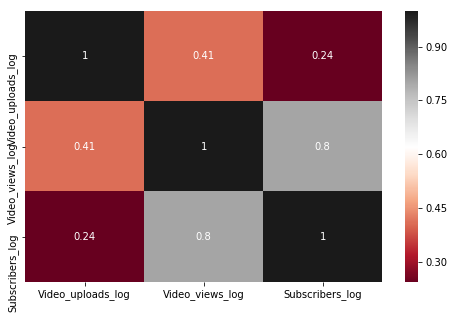

In [46]:
plt.subplots(figsize=(8, 5))
sns.heatmap(df_log.corr(), cmap = 'RdGy',annot=True)

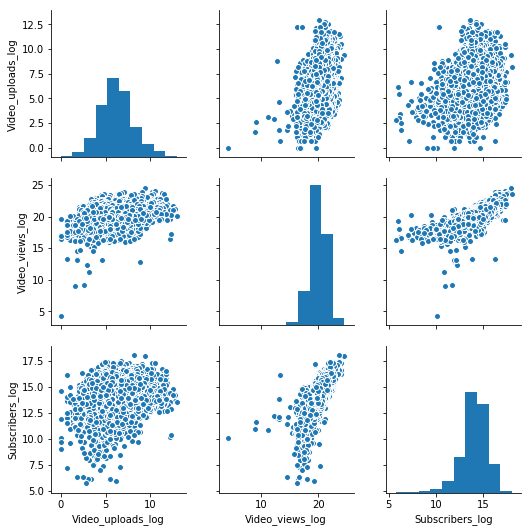

In [47]:
sns.pairplot(df_log)

**Linear model with log transformation**

In [48]:
X2 = df_log[['Video_uploads_log', 'Video_views_log']]
Y2 = df_log[['Subscribers_log']]

In [49]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.2)

In [50]:
lm2 = LinearRegression()
lm2.fit(X2_train.dropna(),y2_train.dropna())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
predictions2 = lm2.predict(X2_test)

Text(0,0.5,'Predicted Y')

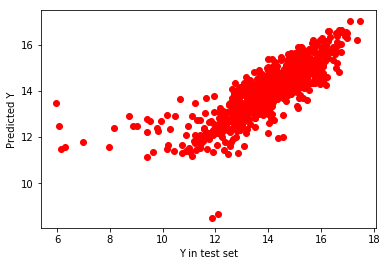

In [52]:
plt.scatter(y2_test,predictions2, color = 'red')
plt.xlabel('Y in test set')
plt.ylabel('Predicted Y')

Text(0.5,1,'standardized residual plot')

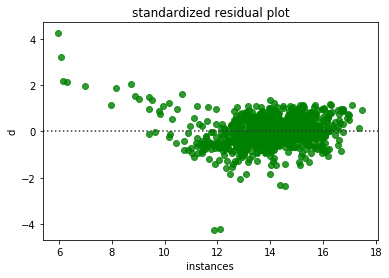

In [53]:
sns.residplot(y2_test, predictions2,  color="g")
plt.ylabel('d')
plt.xlabel('instances')
plt.title('standardized residual plot')

In [54]:
print('MAE:', metrics.mean_absolute_error(y2_test, predictions2))
print('MSE:', metrics.mean_squared_error(y2_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, predictions2)))

MAE: 0.568118749512211
MSE: 0.7760020833302815
RMSE: 0.8809098043104535


In [55]:
coefficients2 = pd.DataFrame(X2.columns)
coefficients2['coefficients']=lm2.coef_[0]
coefficients2

,0,coefficients
0,Video_uploads_log,-0.076472
1,Video_views_log,0.827890


In [58]:
model2 = sm.OLS(Y2, X2).fit() 
predictions2 = model2.predict(X2_test)

In [59]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Subscribers_log   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 6.257e+05
Date:                Thu, 25 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:22:09   Log-Likelihood:                -5807.4
No. Observations:                4610   AIC:                         1.162e+04
Df Residuals:                    4608   BIC:                         1.163e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Video_uploads_log    -0.0598      0.007     -8.455      0.000      -0.074      -0.046
Video_views_log       0.7199      0.002    312.289      0.000       0.715       0.724
==============================================================================
Omnibus:                     1605.423   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23927.454
Skew:                          -1.248   Prob(JB):                         0.00
Kurtosis:                      13.878   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Comparing the result with and without log transformation**

Without using log: 

Y = a X_1  + b X_2 + c 

With log 

ln(Y) = p ln(X_1) + q ln(X_2) + r

From the later 

Y = exp( p .... ) = X_1 ^ p + X_2 ^ q + e^r 

In the following, the prediction made by the log transformation is compared with the one done directly.  The relation is mentioned in above shell.

In [60]:
p = coefficients2['coefficients'][0]
q = coefficients2['coefficients'][1]

In [61]:
def pred_from_log(x, y):
    return x ** p + y ** q

In [62]:
X_test.head()

,Video Uploads,Video views
4953,9178.0,279505979
4391,2321.0,131193046
4967,293.0,122606879
2475,252.0,741476286
4926,158.0,180400520


In [63]:
vid_upl_test = np.array(X_test['Video Uploads'])
vid_viw_test = np.array(X_test['Video views'])

In [64]:
prediction_log = pred_from_log(vid_upl_test, vid_viw_test)

It is nice that both predictions are highly correleted.

Text(0,0.5,'prediction with log transformation')

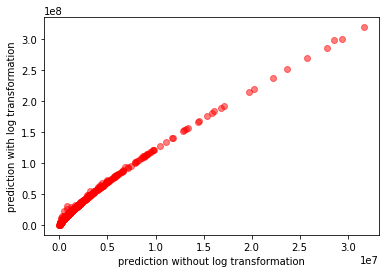

In [65]:
plt.scatter(predictions, prediction_log, color = 'r', alpha = 0.5)
plt.xlabel('prediction without log transformation')
plt.ylabel('prediction with log transformation')

The direct plot of the difference shows that log transformation tend to predict higher value than that without log if anything. There is no way it can predict lower though. 

Text(0,0.5,'difference of prediction with and without log')

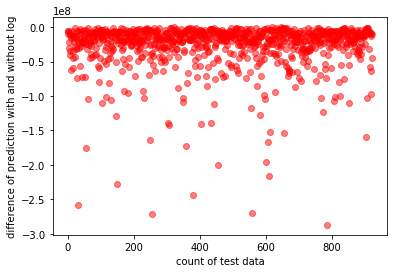

In [66]:
plt.scatter(range(len(X_test)), predictions - prediction_log, color = 'red', alpha = 0.5)
plt.xlabel('count of test data')
plt.ylabel('difference of prediction with and without log')

## SVM

In [67]:
from sklearn import svm

In [68]:
model3=svm.SVR()

In [69]:
model3.fit(X2_train.dropna(),y2_train.dropna())

C:\Users\MEGHANA\Anaconda3\envs\bostonhousing\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [70]:
predictions3 = model3.predict(X2_test)

Text(0,0.5,'Predicted Y')

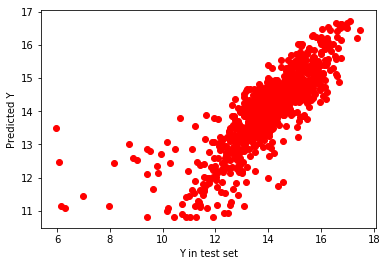

In [72]:
plt.scatter(y2_test,predictions3, color = 'red')
plt.xlabel('Y in test set')
plt.ylabel('Predicted Y')

In [73]:
print('MAE:', metrics.mean_absolute_error(y2_test, predictions3))
print('MSE:', metrics.mean_squared_error(y2_test, predictions3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, predictions3)))

MAE: 0.5553708472373239
MSE: 0.7405972524797477
RMSE: 0.8605796026398417


**Conclusion**

Conclusion of the study is the following:
* The number of subscribers is proportional to the number of views. 
* The number of subscribers in negatively correlated witht the number of video uploads by the channel. 
* Linear model was tested for prediction of number of subscriber as a function of number of video uploads and number of video views.
*  Log transformation on the linear model gives the one sided biased prediction in comparison to the one without such transformation. 
